In [20]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(84).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(44).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(245).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/6.jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(238).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(196).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(108).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(310).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image (5).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(186).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(29).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(140).jpg
/kaggle/input/brain-tumor-classification-mri/Training/no_tumor/image(224).jpg

In [21]:
import keras #deeplearningconcepts will also be included
from keras.models import Sequential #default
#LAYERS and MODELS
from keras.layers import Conv2D,Flatten,Dense,MaxPooling2D,Dropout
#input layer Convulutional,flatten basically return the output in 1d array
#Dense layer:all computation occurs,Max Pooling goes hand in hand with conv
#Pools store info from conv layer,Dropout used as some less relatable features are dropped
#ACCURACY SCORE
from sklearn.metrics import accuracy_score






In [22]:
#IMAGE DATA GENERATION
import ipywidgets as widgets #used for classification
import io #os functionalities used
from PIL import Image #public image library
import tqdm
from sklearn.model_selection import train_test_split
import cv2 #opencv
from sklearn.utils import shuffle #to shuffle images into training and testing
import tensorflow as tf
#to execute the model tensorflowmodule needed


FOLDER PATH



In [23]:
X_train=[]
Y_train=[]
image_size=150 #scaling the images of different sizes to same one
labels=['glioma_tumor','meningioma_tumor','no_tumor','pituitary_tumor']
for i in labels:
    folderpath=os.path.join('/kaggle/input/brain-tumor-classification-mri/Training',i)#joins paths
    #to read images in each path:
    for j in os.listdir(folderpath):  #lists all files present in folder
        img=cv2.imread(os.path.join(folderpath,j))
        img=cv2.resize(img,(image_size,image_size))#width and height scaling of images
        X_train.append(img)
        Y_train.append(i)#append labels itself
#here in this project,we won't do training testing as per dataset,instead we will
#combine both training and testing and do both according to our project
for i in labels:
    folderpath=os.path.join('/kaggle/input/brain-tumor-classification-mri/Testing',i)#joins paths
    #to read images in each path:
    for j in os.listdir(folderpath):  #lists all files present in folder
        img=cv2.imread(os.path.join(folderpath,j))
        img=cv2.resize(img,(image_size,image_size))#width and height scaling of images
        X_train.append(img)
        Y_train.append(i)#append labels itself
        
        
#here we are taking testing and training images both into training variable
#this is done to avoid baising

#now since train variables are in 1d array,we need to convert it into np array
X_train=np.array(X_train)
Y_train=np.array(Y_train)

        
        
        

In [24]:
#Shuffle
#we have to shuffle both the variables together as otherwise it will be alternative
X_train,Y_train= shuffle(X_train,Y_train,random_state=101)#random state ensures shufflin has occured properly
X_train.shape
#has 3264 image of size 150*150,has 3 channels determined by rgb




(3264, 150, 150, 3)

TRAIN,TEST,SPLIT

In [25]:
X_train,X_test,Y_train,Y_test=train_test_split(X_train,Y_train,test_size=0.1,random_state=101)



In [26]:
#need numerical value to create CNN,so deal with y train first
Y_train_new=[]
for i in Y_train:
    Y_train_new.append(labels.index(i))
Y_train=Y_train_new
Y_train=tf.keras.utils.to_categorical(Y_train) #to avoid errors in data format

Y_test_new=[]
for i in Y_test:
    Y_test_new.append(labels.index(i))
Y_test=Y_test_new
Y_test=tf.keras.utils.to_categorical(Y_test)


CONVONUTIONAL NEURAL NETWORK

In [27]:
model=Sequential() #irrespective of arr or cnn
#Adding Layers
model.add(Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))  #32 is no. of parameters,3x3 is padding matrix
model.add(Conv2D(64,(3,3),activation='relu')) #64 parameters,determines output units the layer will have
model.add(MaxPooling2D(2,2)) 
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Conv2D(64,(3,3),activation='relu'))
model.add(Dropout(0.3))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Conv2D(128,(3,3),activation='relu'))
model.add(Conv2D(256,(3,3),activation='relu'))
model.add(MaxPooling2D(2,2))
model.add(Dropout(0.3))
model.add(Flatten())
model.add(Dense(512,activation = 'relu'))
model.add(Dense(512,activation = 'relu'))
model.add(Dropout(0.3))
model.add(Dense(4,activation='softmax'))


In [28]:
model.summary() #how many parameters we have and how many we are going to train 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 146, 146, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 73, 73, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 71, 71, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 69, 69, 64)        36928     
                                                                 
 dropout (Dropout)           (None, 69, 69, 64)        0         
                                                        

COMPILE MODEL

In [31]:
model.compile(loss='categorical_crossentropy',optimizer='Adam',metrics=['accuracy'])
#losses,opimizer,metrics:accuracy

TRAINING MODEL

In [32]:
history=model.fit(X_train,Y_train,epochs=20,validation_split=0.1) #takes time
#validation splits runs continuously and trains the model
#fitting model according to the parameters

Epoch 1/20


2023-06-15 19:34:00.322984: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:954] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential/dropout/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


83/83 [==============================] - 18s 68ms/step - loss: 1.7751 - accuracy: 0.3065 - val_loss: 1.1992 - val_accuracy: 0.4626
Epoch 2/20
83/83 [==============================] - 4s 52ms/step - loss: 1.0508 - accuracy: 0.5395 - val_loss: 1.0749 - val_accuracy: 0.5544
Epoch 3/20
83/83 [==============================] - 4s 52ms/step - loss: 0.8955 - accuracy: 0.6126 - val_loss: 0.8173 - val_accuracy: 0.6565
Epoch 4/20
83/83 [==============================] - 4s 51ms/step - loss: 0.7761 - accuracy: 0.6799 - val_loss: 0.7477 - val_accuracy: 0.6769
Epoch 5/20
83/83 [==============================] - 4s 52ms/step - loss: 0.6222 - accuracy: 0.7556 - val_loss: 0.6510 - val_accuracy: 0.7007
Epoch 6/20
83/83 [==============================] - 4s 51ms/step - loss: 0.5205 - accuracy: 0.8025 - val_loss: 0.5893 - val_accuracy: 0.7415
Epoch 7/20
83/83 [==============================] - 4s 51ms/step - loss: 0.4072 - accuracy: 0.8441 - val_loss: 0.4402 - val_accuracy: 0.8469
Epoch 8/20
83/83 [=====

In [34]:
import matplotlib.pyplot as plt
import seaborn as sns

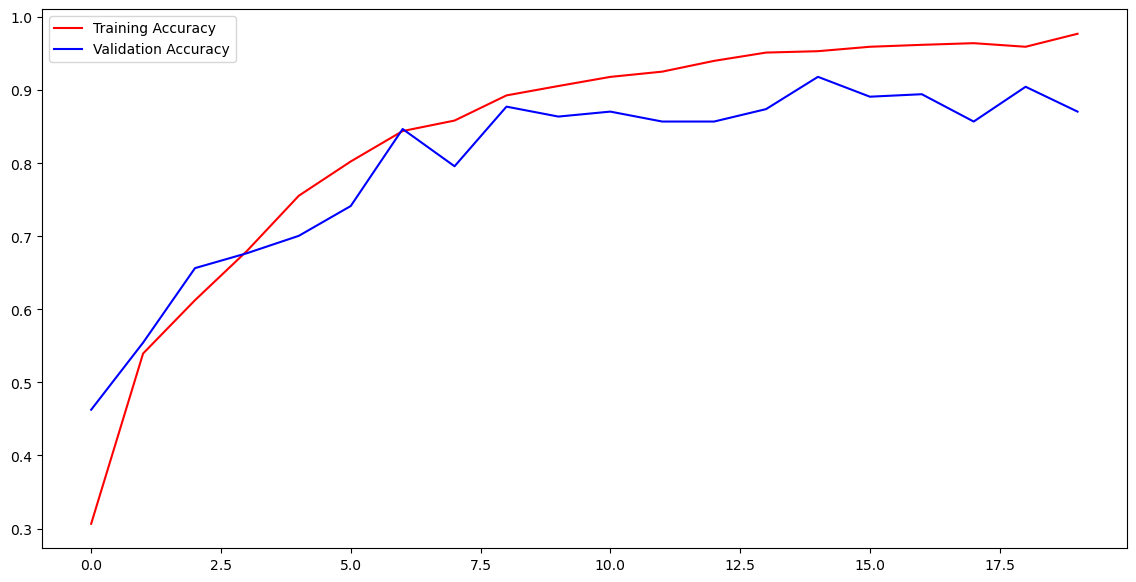

In [35]:
model.save('braintumor.h5')

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(len(acc))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,acc,'r',label="Training Accuracy")
plt.plot(epochs,val_acc,'b',label="Validation Accuracy")
plt.legend(loc='upper left')
plt.show()

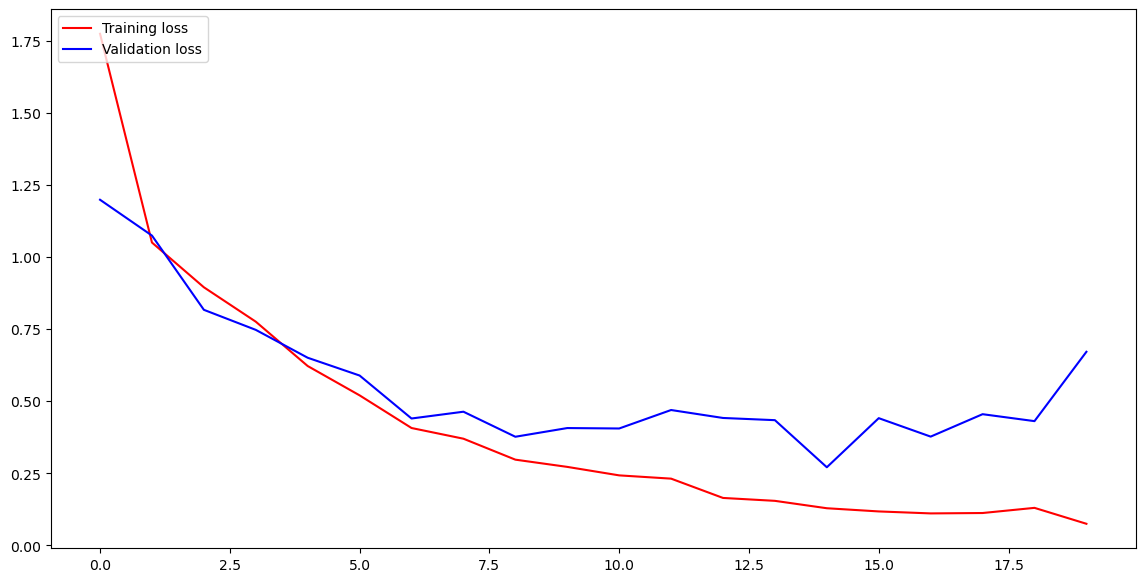

In [36]:
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(loss))
fig = plt.figure(figsize=(14,7))
plt.plot(epochs,loss,'r',label="Training loss")
plt.plot(epochs,val_loss,'b',label="Validation loss")
plt.legend(loc='upper left')
plt.show()

PREDICTION

In [38]:
img = cv2.imread('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
img = cv2.resize(img,(150,150))
img_array = np.array(img)
img_array.shape

(150, 150, 3)

In [39]:
img_array = img_array.reshape(1,150,150,3)
img_array.shape

(1, 150, 150, 3)

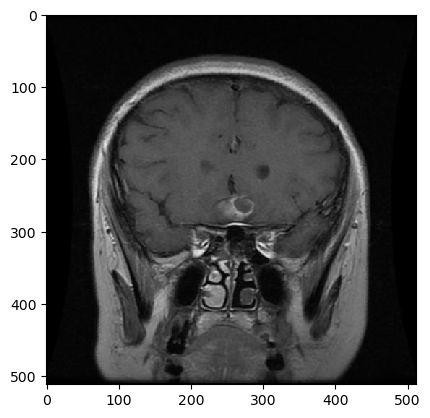

In [40]:
from tensorflow.keras.preprocessing import image
img = image.load_img('../input/brain-tumor-classification-mri/Training/pituitary_tumor/p (107).jpg')
plt.imshow(img,interpolation='nearest')
plt.show()

In [41]:
a=model.predict(img_array)
indices = a.argmax()
indices

1/1 [==============================] - 0s 296ms/step


3